<h3>Objective</h3>
<h4>To find best players from each positions with their age, nationality, club based on their Potential Scores</h4>




<h4>Import the libraries needed</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999
import seaborn as sns
import warnings
warnings.simplefilter('always', category=UserWarning)

<h4> Load data and store in dataframe </h4>

In [2]:
data=pd.read_csv("foot-data.csv")

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data.drop(['Photo','Flag','Club Logo','Joined','Loaned From','ID'],axis=1,inplace=True)

In [5]:
temp=pd.DataFrame([data.dtypes,data.isna().sum()]).T

In [6]:
to_fill_columns=temp[temp[0]=='float64'].index

In [7]:
temp

,0,1
Name,object,0
Age,int64,0
Nationality,object,0
Overall,int64,0
Potential,int64,0
Club,object,241
Value,object,0
Wage,object,0
Special,int64,0
Preferred Foot,object,48


## Data Cleaning

Fill the missing value for the continous variables with Mean(average) for proper data visualization

In [7]:
for i in to_fill_columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [8]:
temp_col=data['Contract Valid Until']
contract_valid_mode=temp_col.mode()[0]
temp_col=temp_col.fillna(contract_valid_mode)
temp=pd.to_datetime(temp_col.loc[temp_col.str.contains('^\d{1,2}-[a-zA-Z]{3}-\d{2}$',regex=True)]).apply(lambda x: x.year)
temp_col.loc[temp.index]=temp
data['Contract Valid Until']=temp_col

In [9]:
data['Contract Valid Until'].value_counts()

2019    5108
2021    4360
2020    4027
2022    1477
2019    1101
2023    1053
2018     886
2018     146
2024      23
2020      17
2025       7
2026       2
Name: Contract Valid Until, dtype: int64

In [10]:
contract_valid_mode

'2019'

In [11]:
temp_col=temp_col.fillna(contract_valid_mode)

In [13]:
temp_col.isna().sum()

0

In [18]:
temp=pd.to_datetime(temp_col.loc[temp_col.str.contains('^\d{1,2}-[a-zA-Z]{3}-\d{2}$',regex=True)]).apply(lambda x: x.year)

In [20]:
temp_col.loc[temp.index]=temp

In [22]:
temp_col.value_counts()

2019    5108
2021    4360
2020    4027
2022    1477
2019    1101
2023    1053
2018     886
2018     146
2024      23
2020      17
2025       7
2026       2
Name: Contract Valid Until, dtype: int64


<h4>What kind of a correlation exists between "Nationality" and "Overall Score"<br><br>
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual <br><br>1.Your observation about the relationship for distribution of overall score in different Nationalities.<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below

In [120]:
overall=data.groupby(['Nationality'])['Overall'].mean().sort_values(ascending=False)

In [121]:
overall=pd.DataFrame(overall)

<AxesSubplot:xlabel='Overall', ylabel='Nationality'>

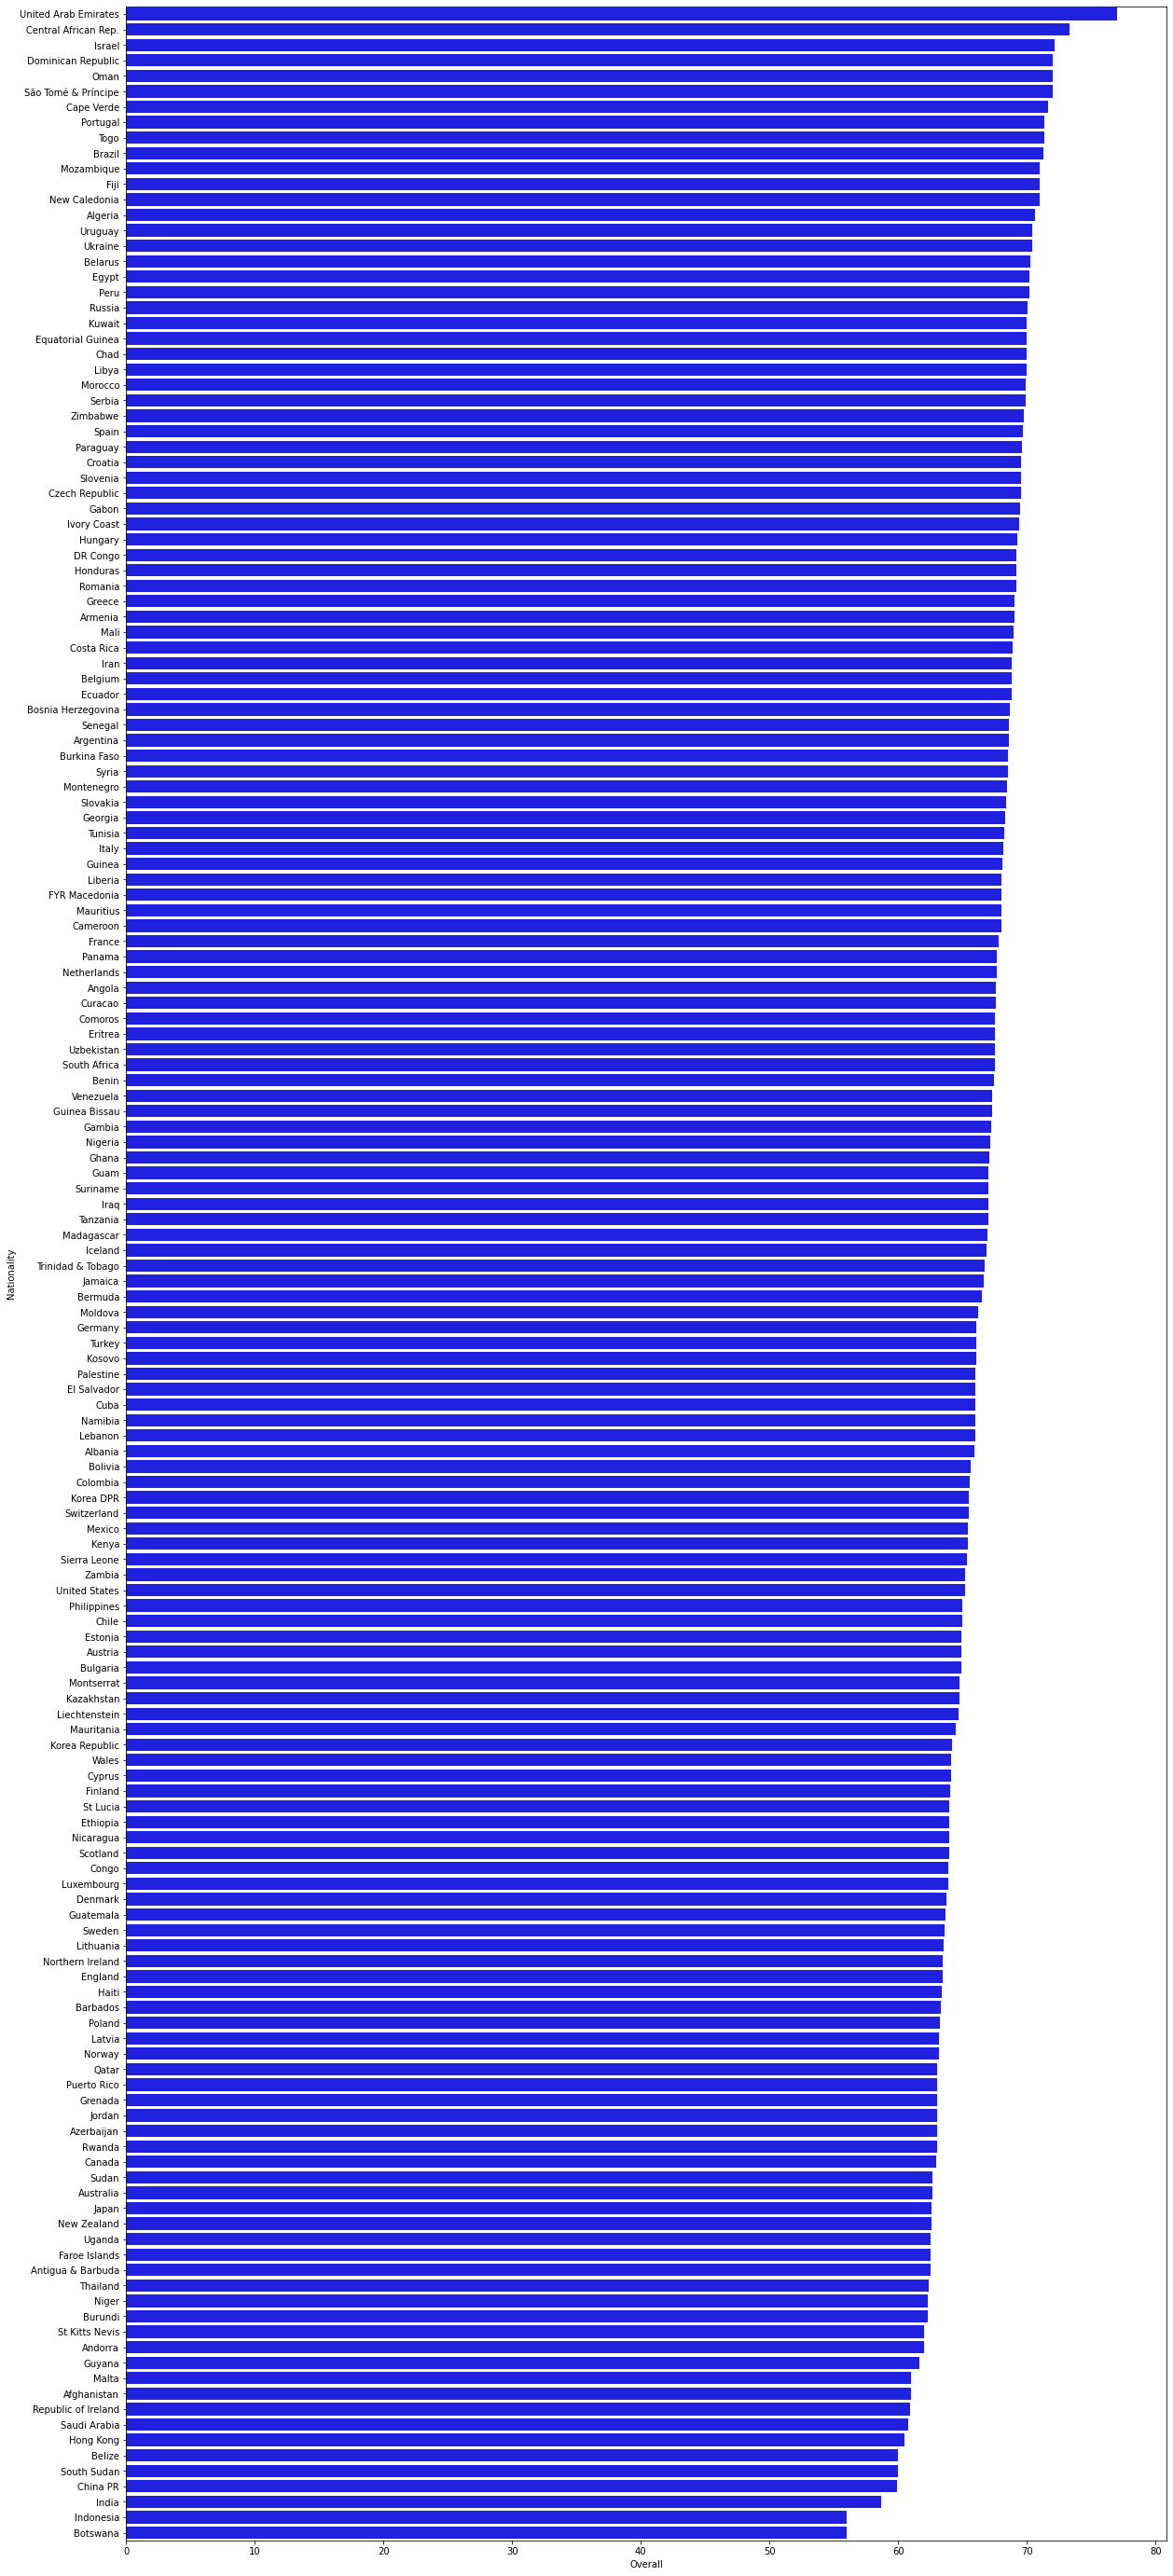

In [122]:
f, ax = plt.subplots(figsize=(20, 50))
sns.barplot(y=overall.index,x='Overall',data=overall,
            label="Average Overall Score", color="b",orient='h')


<h4>What kind of a correlation exists between "Popular Clubs" and "Overall Score"<br><br>
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual <br><br>1.Your observation about the relationship for distribution of overall score in different Popular Clubs.<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below

In [131]:
clubs=data.groupby(['Club'])['Overall'].mean().sort_values(ascending=False)

TOP 50 CLUBS

In [140]:
clubs=pd.DataFrame(clubs.iloc[:50])

<AxesSubplot:xlabel='Overall', ylabel='Club'>

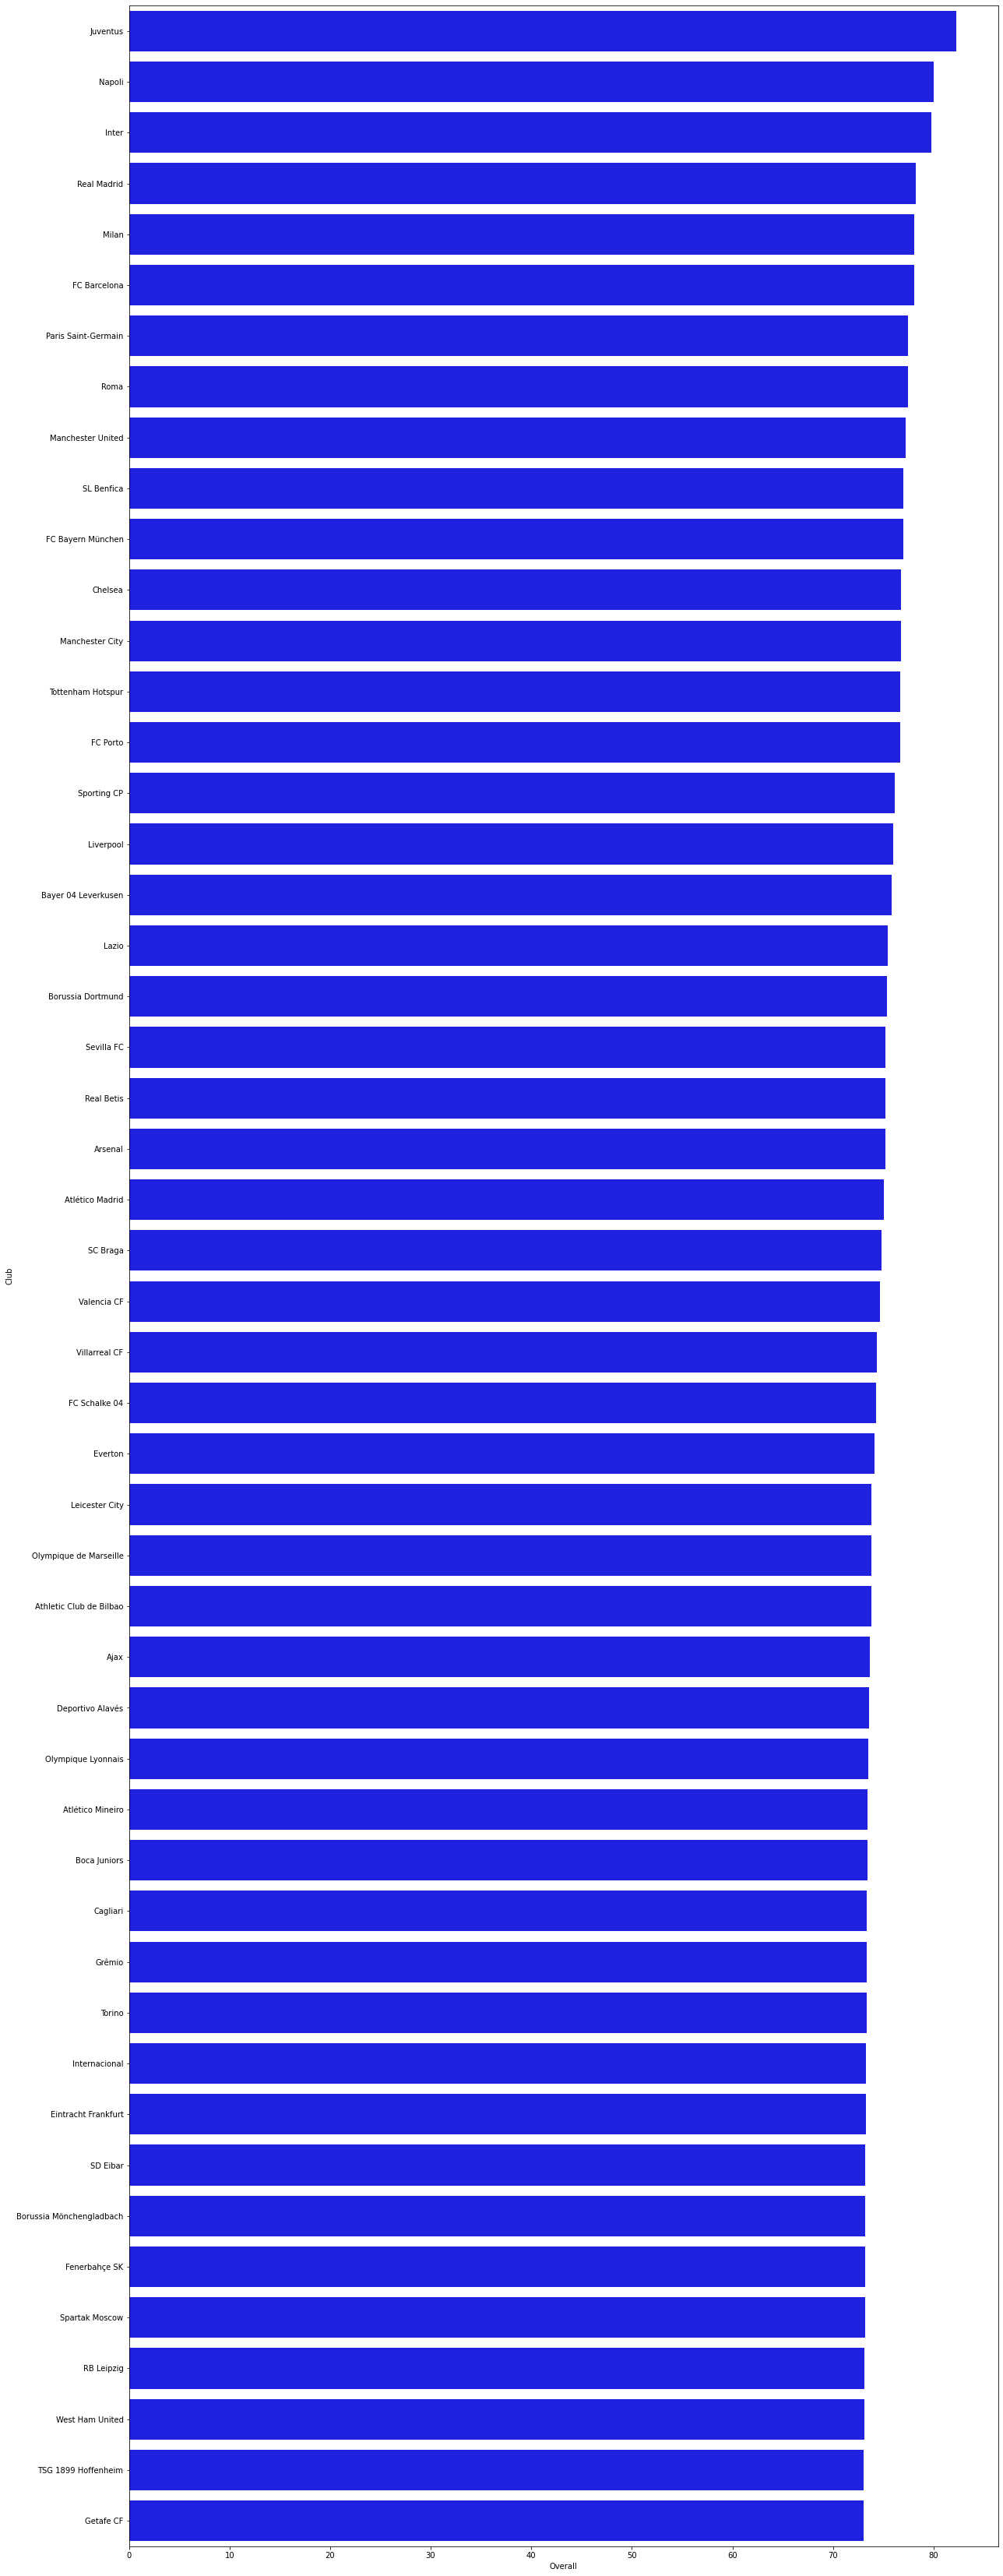

In [141]:
f, ax = plt.subplots(figsize=(20, 60))
sns.barplot(y=clubs.index,x='Overall',data=clubs,
            label="Average Overall Score", color="b",orient='h')


<h4> Demonstrate the distribution of Ages in some Popular Clubs
    Use appropriate visuals to demonstrate the same.
<h4>Clearly mention in markdown cells below the visual <br><br>1.Your observation about the relationship for distribution of overall score in different Age groups.<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below
    

In [197]:
age=data.groupby(['Club'])['Age']

C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudarshan.magaji\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

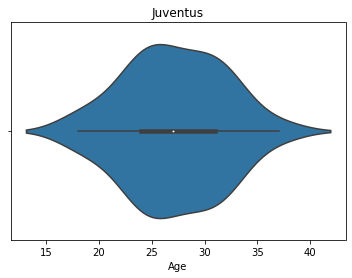

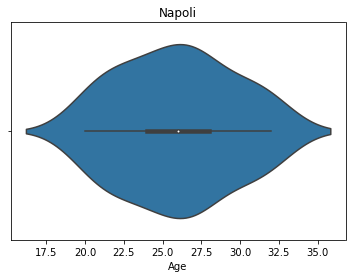

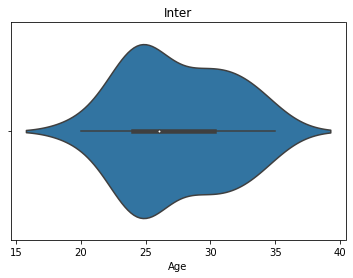

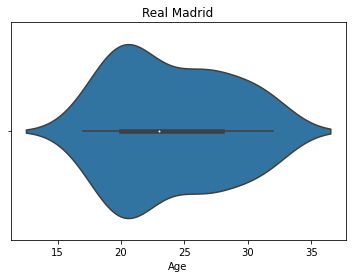

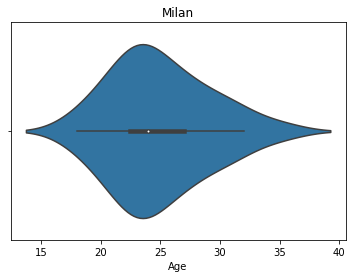

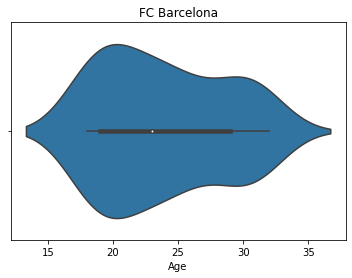

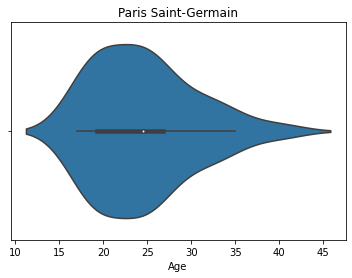

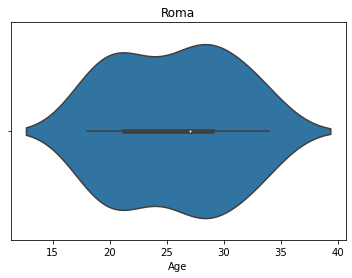

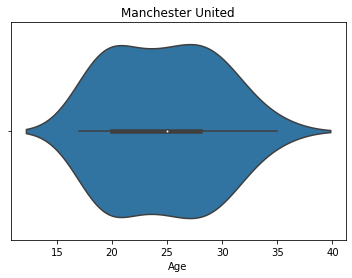

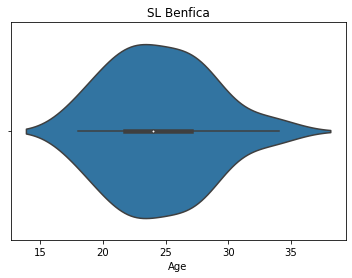

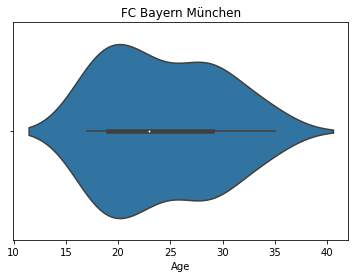

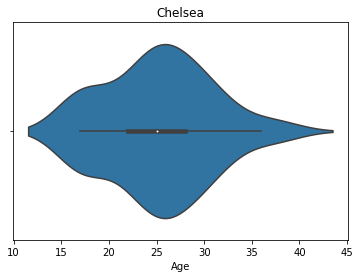

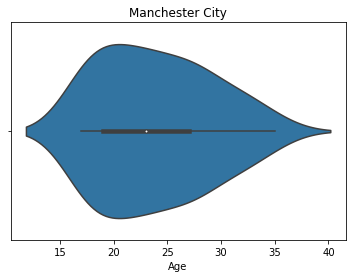

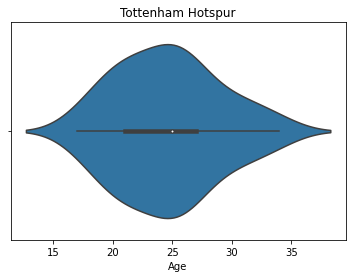

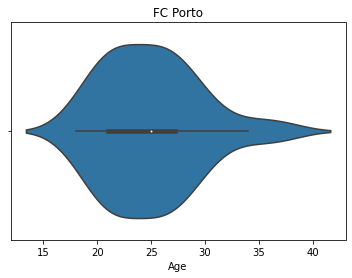

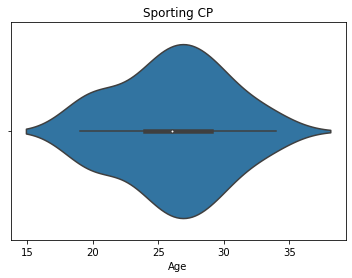

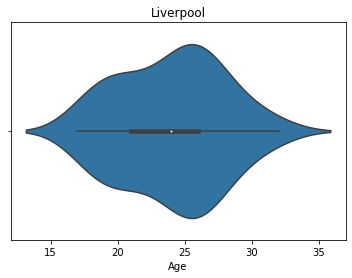

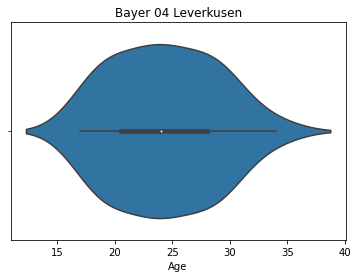

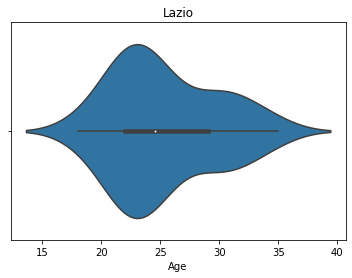

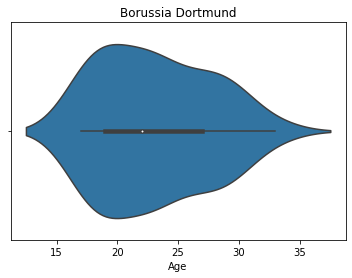

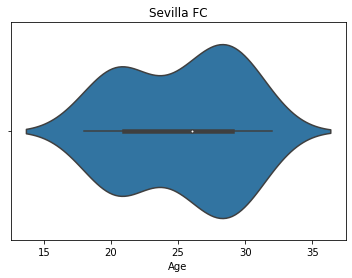

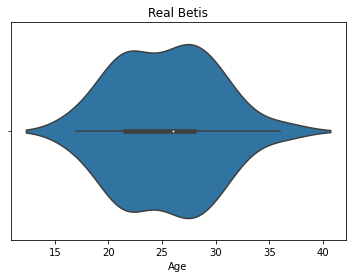

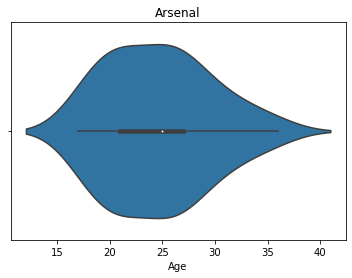

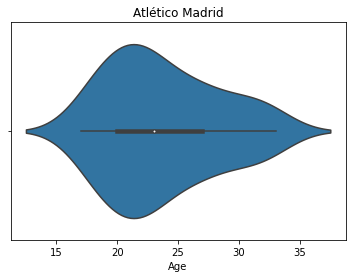

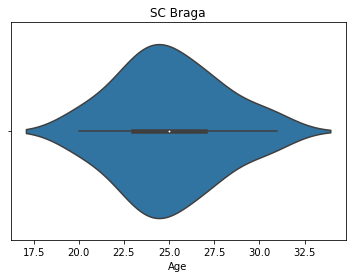

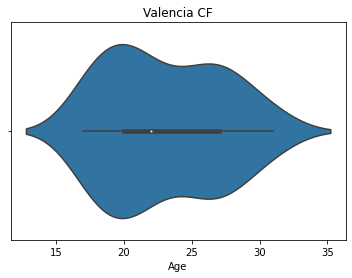

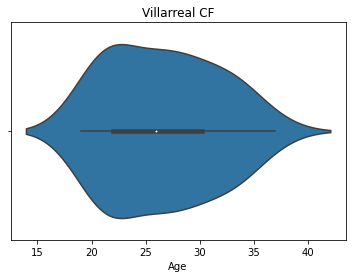

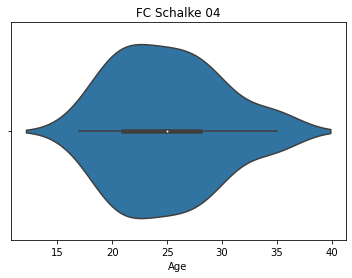

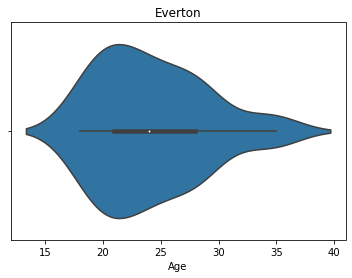

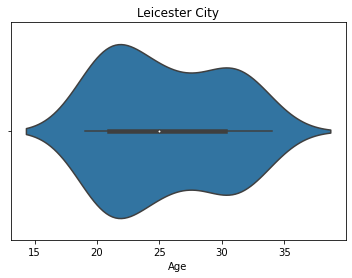

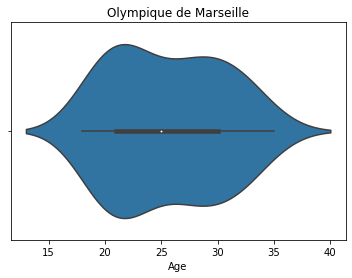

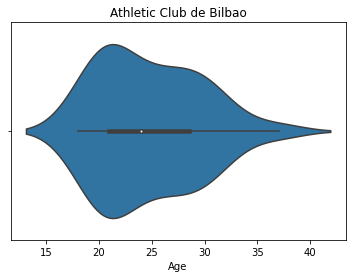

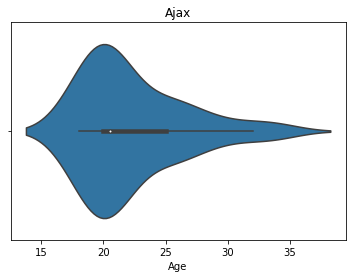

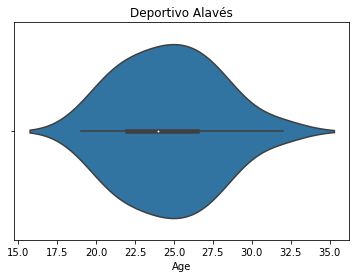

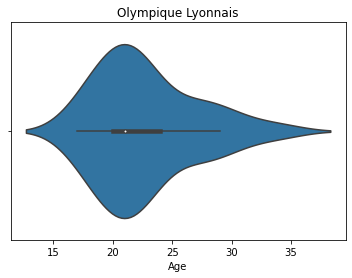

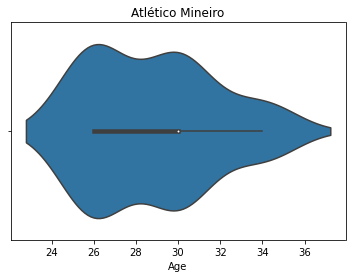

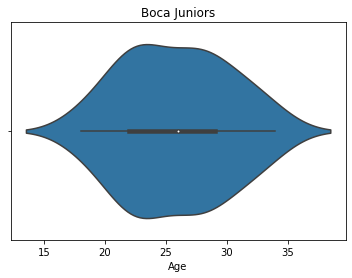

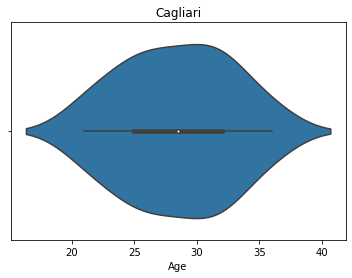

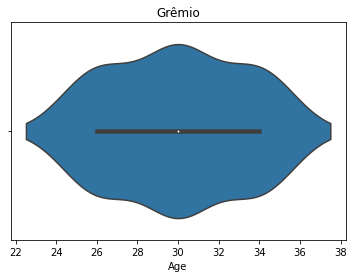

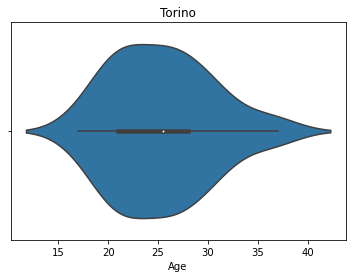

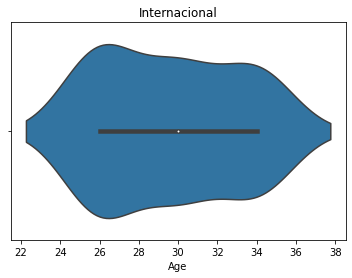

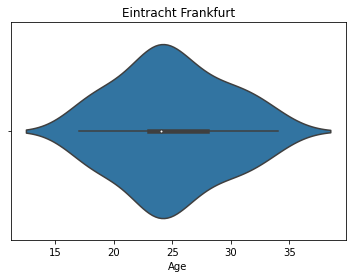

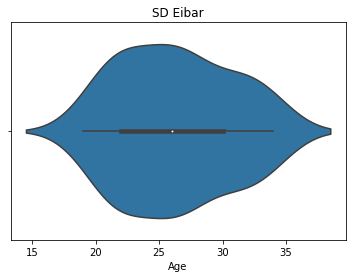

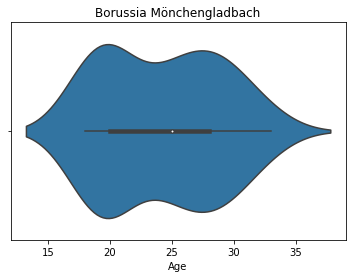

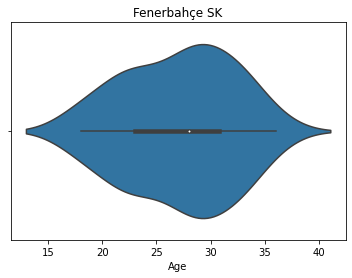

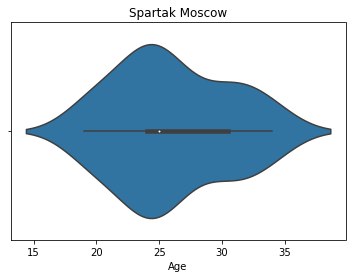

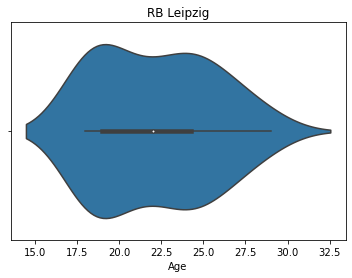

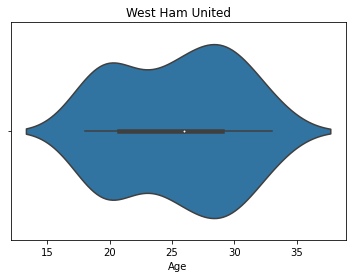

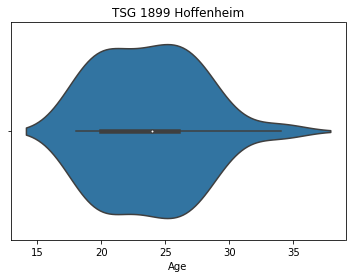

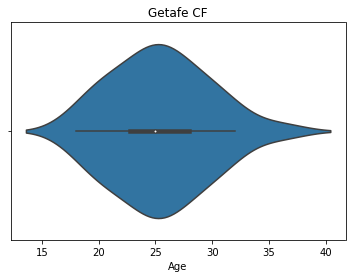

In [223]:
for i in clubs.index:
    ser=age.get_group(i)
    plt.figure(i)
    plt.title(i)
    sns.violinplot(ser)

In [249]:
age_mean=pd.DataFrame(age.mean().sort_values(ascending=False))

In [254]:
age_mean=age_mean.loc[clubs.index].sort_values(ascending=False,by=['Age'])

<AxesSubplot:xlabel='Age', ylabel='Club'>

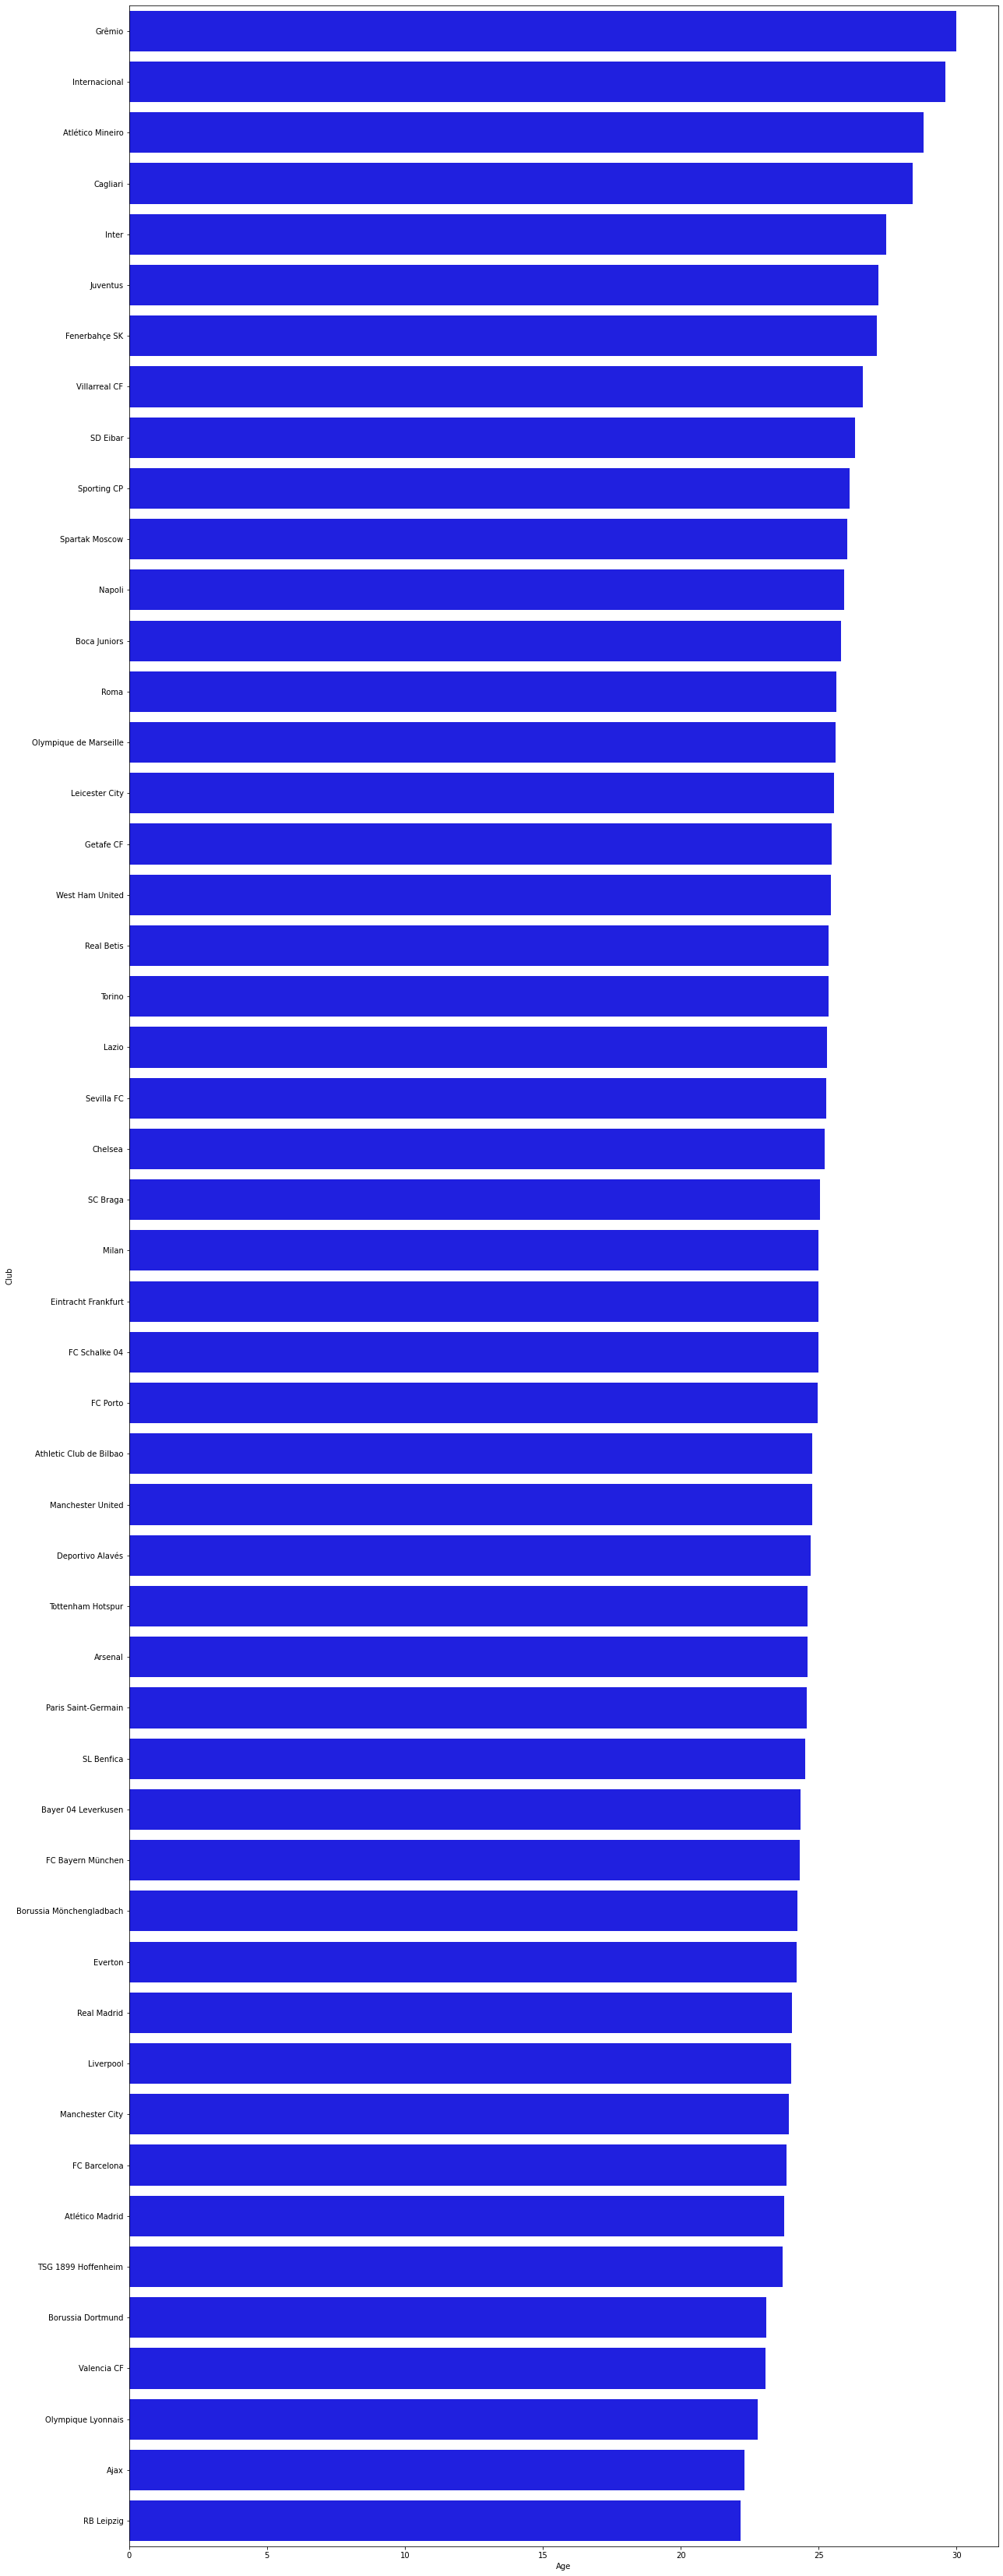

In [255]:
f, ax = plt.subplots(figsize=(20, 60))
sns.barplot(y=age_mean.index,x='Age',data=age_mean,
            label="Average Age", color="b",orient='h')


<h4> Demonstrate and visualize clubs with highest number of different countries.
<h4>Clearly mention in markdown cells below the visual <br><br>1.Your observation about the relationship for distribution of overall score in different Age groups.<br><br>
    2.The reason for selecting the chart type you did in a markdown cell below  

In [258]:
club_nat=pd.DataFrame(data.groupby(['Club'])['Nationality'].count().sort_values(ascending=False))

In [261]:
club_nat

,Nationality
Club,
Burnley,33
Manchester City,33
Everton,33
Southampton,33
Borussia Dortmund,33
Frosinone,33
Fortuna Düsseldorf,33
FC Barcelona,33
RC Celta,33



  <h4> Use a single heat map to visualize the relationship between the features.<br>
Explain the features considered by you to plot the heatmap.

1. Perform the data preprocessing required.<br>
    
2. The heatmap should plot the target variable (overall score) proportional to other variables(features) considered.
    
3. The plot should have labels for x axis and y axis.
    
4. Write down your observations in a markdown cell below the visual

<AxesSubplot:>

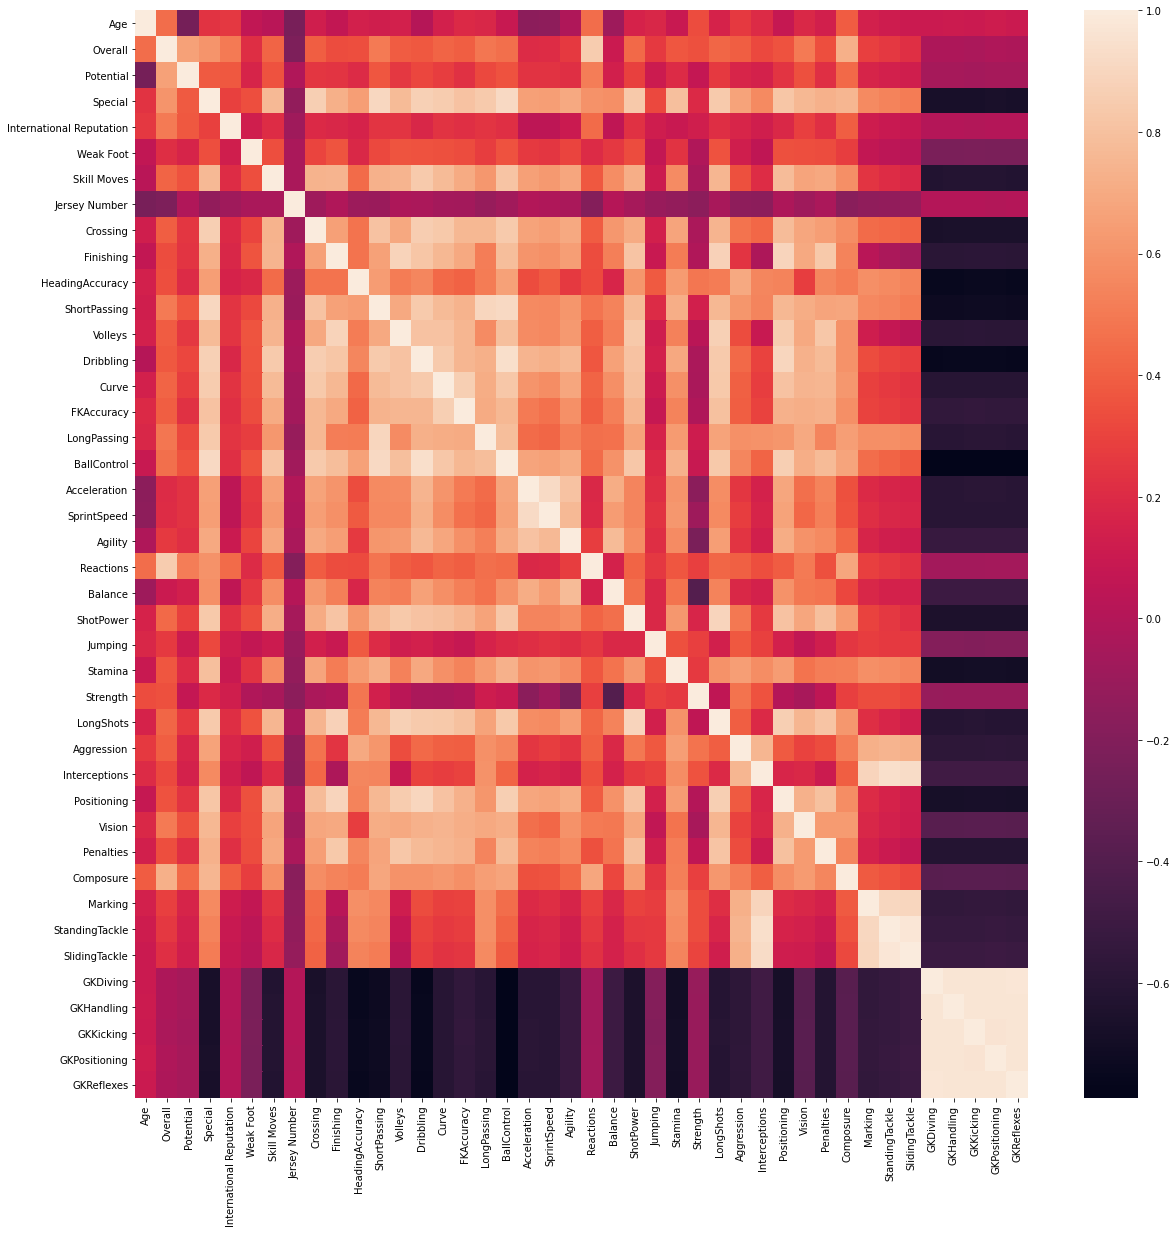

In [277]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

<AxesSubplot:>

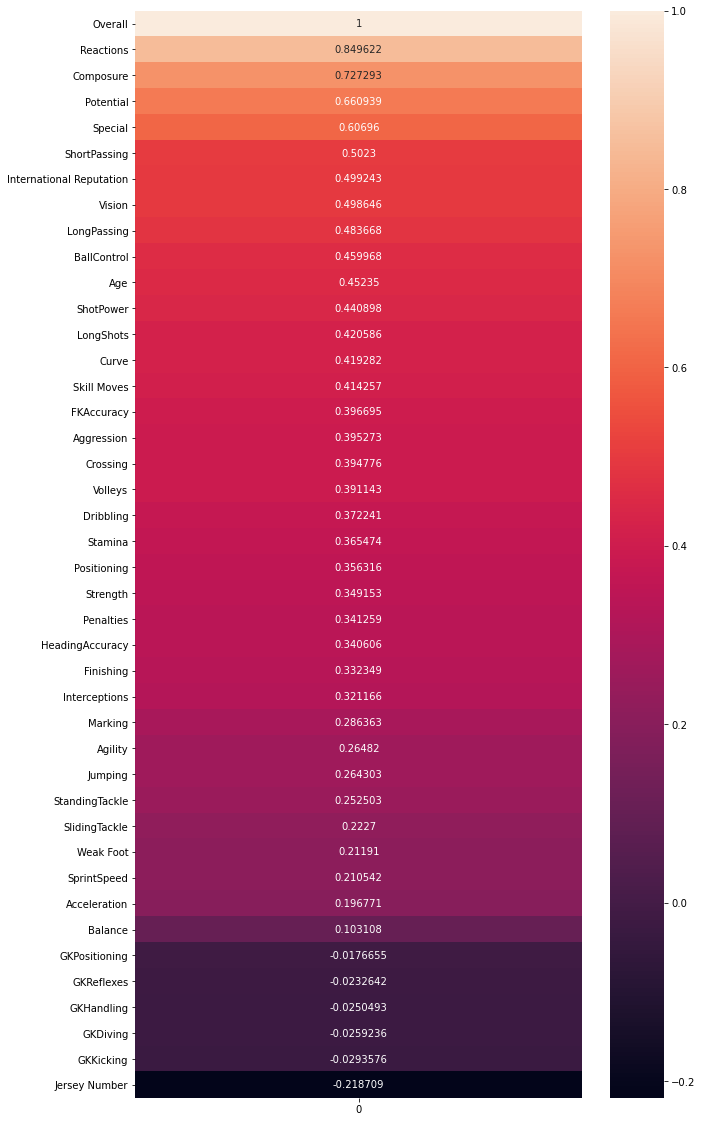

In [284]:
plt.figure(figsize=(10,20))
sns.heatmap(pd.DataFrame(data.corrwith(data['Overall']).sort_values(ascending=False)),annot=True,fmt='g')

#### Best players for each position

In [330]:
pos_group=data.groupby(['Position'])['Overall']

In [337]:
data.loc[pos_group.idxmax()][['Position','Name','Overall']]

,Position,Name,Overall
17,CAM,A. Griezmann,89
12,CB,D. Godín,90
20,CDM,Sergio Busquets,89
271,CF,Luis Alberto,82
67,CM,Thiago,86
3,GK,De Gea,91
28,LAM,J. Rodríguez,88
35,LB,Marcelo,88
24,LCB,G. Chiellini,89
11,LCM,T. Kroos,90
